# Decision Tree Classification


##Required Package Installation

In [64]:
# !pip uninstall matplotlib
# !pip install matplotlib --version=3.0.2
# !pip install six
# !apt-get -qq install -y graphviz && pip install pydot
# !pip install neuraxle
# !pip install graphviz 
# !apt-get install graphviz
# !pip install -q pydot 

## Importing the libraries


In [65]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import LabelEncoder
from neuraxle.steps.column_transformer import ColumnTransformer
from neuraxle.steps.loop import FlattenForEach
import six
from sklearn import tree
from six import StringIO
from IPython.display import Image 
import pydotplus
from sklearn.tree import export_graphviz
import seaborn as sns

##Mount Drive


In [66]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


 ## cd (change directory) to the file/folder location

In [67]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML Datasets/golf-dataset.csv')

In [68]:
dataset

,Outlook,Temp,Humidity,Windy,Play Golf
0,Rainy,Hot,High,False,No
1,Rainy,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Sunny,Mild,High,False,Yes
4,Sunny,Cool,Normal,False,Yes
5,Sunny,Cool,Normal,True,No
6,Overcast,Cool,Normal,True,Yes
7,Rainy,Mild,High,False,No
8,Rainy,Cool,Normal,False,Yes
9,Sunny,Mild,Normal,False,Yes


## Importing the dataset


In [69]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:, -1].values

In [70]:
labelencoder = LabelEncoder()
X[:,0] = labelencoder.fit_transform(X[:,0])
X[:,1] = labelencoder.fit_transform(X[:,1])
X[:,2] = labelencoder.fit_transform(X[:,2])
X[:,3] = labelencoder.fit_transform(X[:,3])
y = labelencoder.fit_transform(y)

In [71]:
X

array([[1, 1, 0, 0],
       [1, 1, 0, 1],
       [0, 1, 0, 0],
       [2, 2, 0, 0],
       [2, 0, 1, 0],
       [2, 0, 1, 1],
       [0, 0, 1, 1],
       [1, 2, 0, 0],
       [1, 0, 1, 0],
       [2, 2, 1, 0],
       [1, 2, 1, 1],
       [0, 2, 0, 1],
       [0, 1, 1, 0],
       [2, 2, 0, 1]], dtype=object)

###Correlation heat map


<AxesSubplot:>

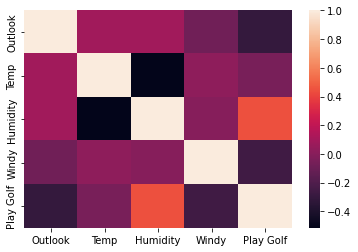

In [72]:
xy = np.column_stack((X, y))
xy
sc = StandardScaler()
xy = sc.fit_transform(xy)
df = pd.DataFrame(xy, columns = ['Outlook',	'Temp',	'Humidity',	'Windy',	'Play Golf'])
df
corr = df.corr()
sns.heatmap(corr,xticklabels=corr.columns, yticklabels=corr.columns)

###Pair plot to visualize the correlation

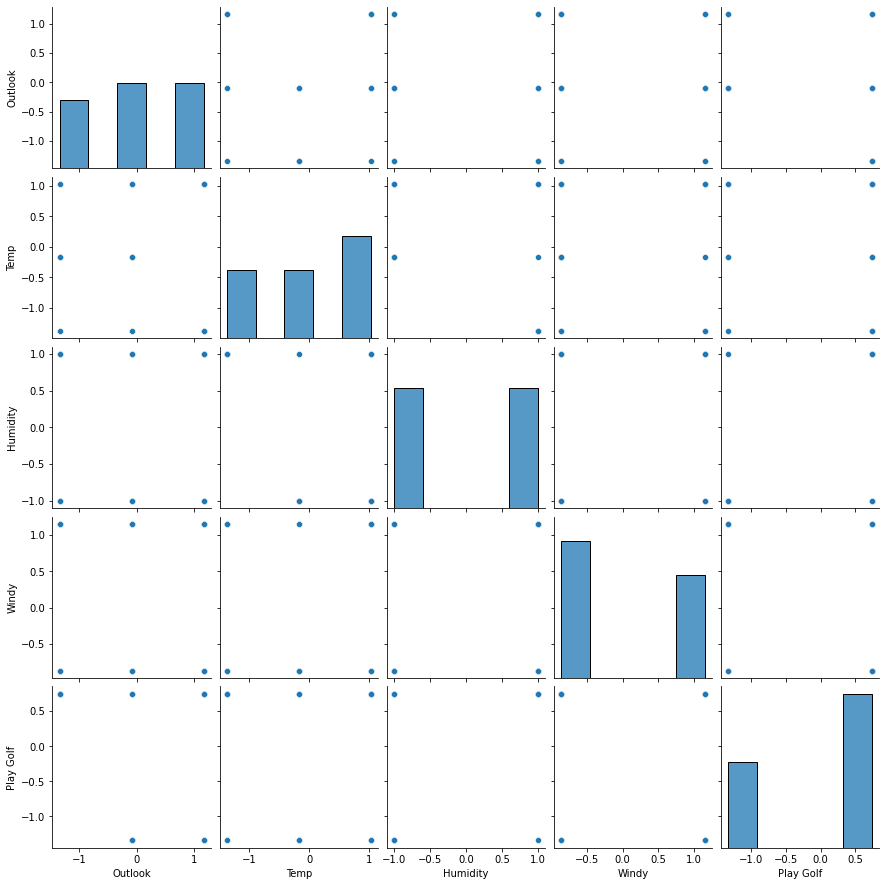

In [73]:
sns.pairplot(df)

In [74]:
y

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

In [75]:
X = X[:,[3,1]]

## Splitting the dataset into the Training set and Test set


In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 10)

In [91]:
X_train

array([[0, 1],
       [1, 2],
       [1, 0],
       [1, 2],
       [1, 2],
       [1, 1],
       [0, 1],
       [0, 0],
       [0, 2]], dtype=object)

In [92]:
X_test

array([[0, 2],
       [0, 2],
       [0, 1],
       [1, 0],
       [0, 0]], dtype=object)

In [93]:
y_train

array([1, 1, 0, 1, 0, 0, 0, 1, 1])

In [94]:
y_test

array([1, 0, 1, 1, 1])

## Feature Scaling


In [95]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Fitting Decision Tree Classification to the Training set


In [96]:
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

## Predicting the Test set results


In [97]:
y_pred = classifier.predict(X_test)

## Making the Confusion Matrix


In [98]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[0 1]
 [2 2]]


In [99]:
accuracy_score(y_test, y_pred)

0.4

## Visualising the Train set results

[21:14:09][WARNING][_axes][4281]: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


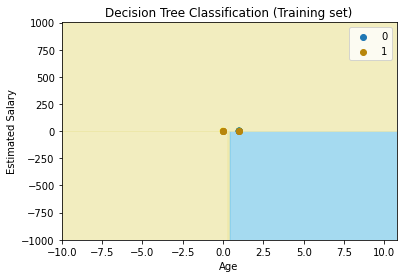

In [104]:
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('skyblue', 'palegoldenrod')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('teal', 'darkgoldenrod'))(i), label = j)
plt.title('Decision Tree Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Visualising the Test set results

[21:14:12][WARNING][_axes][4281]: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


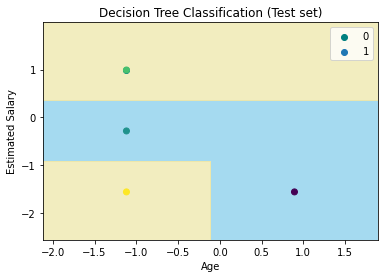

In [105]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('skyblue', 'palegoldenrod')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('teal', 'darkgoldenrod'))(i), label = j)
plt.title('Decision Tree Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


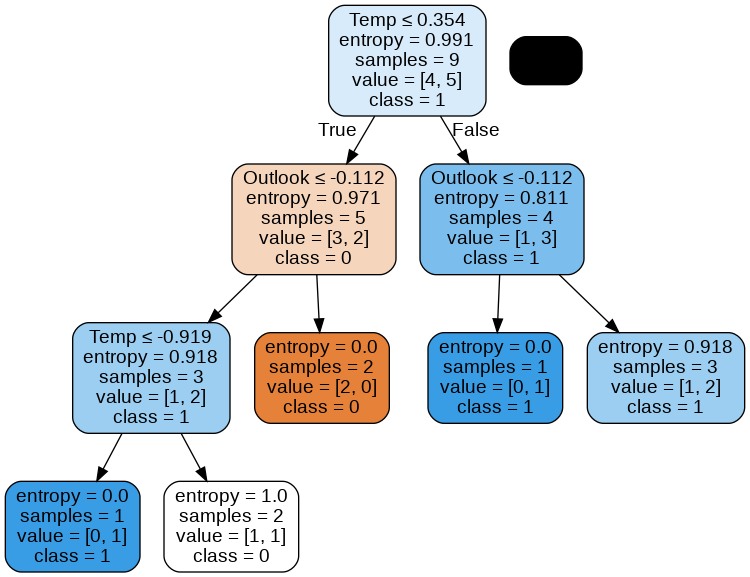

In [106]:
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = ['Outlook','Temp'],class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())